In [21]:
%load_ext autoreload
%autoreload 2
from LHCB_Velo_Toy_Models.state_event_generator import *
from LHCB_Velo_Toy_Models import state_event_model 

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
dz = 20 #mm

n_particles=[30, 30, 30]
events = len(n_particles)
layers = 5

n = np.sum(n_particles)

module_id = [l for l in range(1, layers+1)]
lx = [33 for x in range(1, layers+1)]
ly = [33 for x in range(1, layers+1)]
zs = [dz*l for l in range(1, layers+1)]

Detector = state_event_model.PlaneGeometry(module_id=module_id,lx = lx,ly = ly,z = zs)
# Detector = state_event_model.RectangularVoidGeometry(module_id=module_id,lx = lx,ly = ly,z=zs, void_x_boundary=5, void_y_boundary=5)

state_event_gen = StateEventGenerator(Detector, events = len(n_particles), n_particles=n_particles,
                                       measurement_error=0.0)#, collision_noise=0.5)
state_event_gen.generate_random_primary_vertices(events, {'x': 0, 'y': 0, 'z': 0})

[(0, 0, 0.0), (0, 0, 0.0), (0, 0, 0.0)]

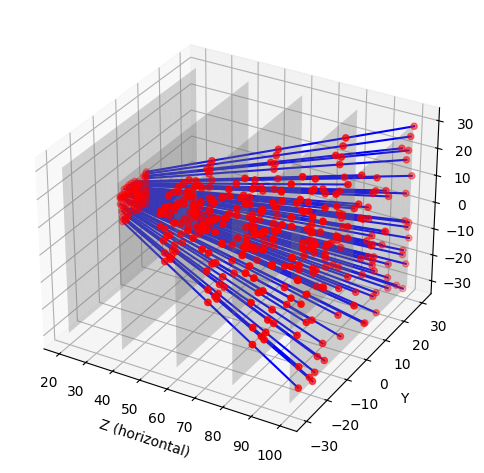

In [23]:
event_particles = []
for event in range(events):
    particles_list = []
    for particle in range(n):
        particle_dict = {
            'type' : 'MIP',
            'mass': 0.511,
            'q': 1
        }
        particles_list.append(particle_dict)
    event_particles.append(particles_list)

state_event_gen.generate_particles(event_particles)

event_tracks = state_event_gen.generate_complete_events()

event_tracks.plot_segments()

In [24]:
false_tracks = state_event_gen.make_noisy_event(drop_rate=0.0, ghost_rate=0.0)

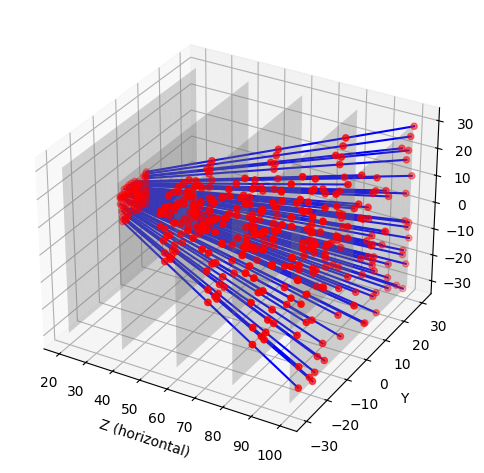

In [25]:
false_tracks.plot_segments()

In [26]:
from LHCB_Velo_Toy_Models.simple_hamiltonian import SimpleHamiltonian

ham = SimpleHamiltonian(
        epsilon=1e-7,
        gamma=2.0,
        delta=1.0
    )

ham.construct_hamiltonian(event=event_tracks)
classical_solution = ham.solve_classicaly()
T = .45
discretized_classical_solution = (classical_solution > T).astype(int)
classical_solution

array([0.6       , 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
       0.6       ], shape=(32400,))

In [27]:
from LHCB_Velo_Toy_Models.simple_hamiltonian import get_tracks

truth_event = false_tracks
rec_tracks = get_tracks(ham, classical_solution, false_tracks) 
from LHCB_Velo_Toy_Models.toy_validator import EventValidator as evl
validator = evl(truth_event, rec_tracks)
validator.print_metrics()

=== Event Validation Metrics ===
Total Reconstructed Tracks: 90
Total Truth Tracks: 90
Reconstruction Efficiency: 100.00%
Ghost Rate: 0.00%
Clone Fraction: 0.00% (0 clones)
Hit Efficiency: 100.00%
Purity: 100.00%


In [28]:
event_tracks.hits

[Hit(hit_id=0, x=np.float64(2.216419426184174), y=np.float64(-3.9816726711416535), z=20, module_id=1, track_id=0),
 Hit(hit_id=1, x=np.float64(4.434879357491915), y=np.float64(-7.963990566212814), z=40, module_id=2, track_id=0),
 Hit(hit_id=2, x=np.float64(6.652144850997088), y=np.float64(-11.946418091127597), z=60, module_id=3, track_id=0),
 Hit(hit_id=3, x=np.float64(8.86918479694629), y=np.float64(-15.929460992368579), z=80, module_id=4, track_id=0),
 Hit(hit_id=4, x=np.float64(11.085036884489057), y=np.float64(-19.913123582693828), z=100, module_id=5, track_id=0),
 Hit(hit_id=5, x=np.float64(-4.153120452107719), y=np.float64(2.5903345818513097), z=20, module_id=1, track_id=1),
 Hit(hit_id=6, x=np.float64(-8.306185042243165), y=np.float64(5.178821661672485), z=40, module_id=2, track_id=1),
 Hit(hit_id=7, x=np.float64(-12.4615713977465), y=np.float64(7.7684576655263236), z=60, module_id=3, track_id=1),
 Hit(hit_id=8, x=np.float64(-16.618369528856753), y=np.float64(10.35541248491543),

In [29]:
print(event_tracks.hits)
print(event_tracks.segments)
print(event_tracks.tracks)
print(event_tracks.modules)

[Hit(hit_id=0, x=np.float64(2.216419426184174), y=np.float64(-3.9816726711416535), z=20, module_id=1, track_id=0), Hit(hit_id=1, x=np.float64(4.434879357491915), y=np.float64(-7.963990566212814), z=40, module_id=2, track_id=0), Hit(hit_id=2, x=np.float64(6.652144850997088), y=np.float64(-11.946418091127597), z=60, module_id=3, track_id=0), Hit(hit_id=3, x=np.float64(8.86918479694629), y=np.float64(-15.929460992368579), z=80, module_id=4, track_id=0), Hit(hit_id=4, x=np.float64(11.085036884489057), y=np.float64(-19.913123582693828), z=100, module_id=5, track_id=0), Hit(hit_id=5, x=np.float64(-4.153120452107719), y=np.float64(2.5903345818513097), z=20, module_id=1, track_id=1), Hit(hit_id=6, x=np.float64(-8.306185042243165), y=np.float64(5.178821661672485), z=40, module_id=2, track_id=1), Hit(hit_id=7, x=np.float64(-12.4615713977465), y=np.float64(7.7684576655263236), z=60, module_id=3, track_id=1), Hit(hit_id=8, x=np.float64(-16.618369528856753), y=np.float64(10.35541248491543), z=80, m

In [30]:
[h in event_tracks.hits for h in range(1, layers+1) ]

[False, False, False, False, False]